In [1]:
!pip install tflite-model-maker

     |████████████████████████████████| 593kB 27.5MB/s 
     |████████████████████████████████| 174kB 39.8MB/s 
     |████████████████████████████████| 645kB 35.0MB/s 
     |████████████████████████████████| 112kB 54.1MB/s 
     |████████████████████████████████| 122kB 40.8MB/s 
     |████████████████████████████████| 1.2MB 39.2MB/s 
     |████████████████████████████████| 849kB 37.2MB/s 
     |████████████████████████████████| 6.3MB 28.9MB/s 
     |████████████████████████████████| 1.1MB 27.2MB/s 
     |████████████████████████████████| 686kB 36.7MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
     |████████████████████████████████| 38.2MB 101kB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
     |████████████████████████████████| 358kB 43.9MB/s 
     |████████████████████████████████| 194kB 41.4MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=917b04fb1c38901841abd

In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**

In [13]:
train_data = DataLoader.from_folder ('/content/drive/MyDrive/Bangkit_Project/Batik/train')
test_data = DataLoader.from_folder ('/content/drive/MyDrive/Bangkit_Project/Batik/test')
validation_data = DataLoader.from_folder ('/content/drive/MyDrive/Bangkit_Project/Batik/validation')

INFO:tensorflow:Load image with size: 2000, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


INFO:tensorflow:Load image with size: 2000, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


INFO:tensorflow:Load image with size: 953, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


INFO:tensorflow:Load image with size: 953, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


INFO:tensorflow:Load image with size: 980, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


INFO:tensorflow:Load image with size: 980, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


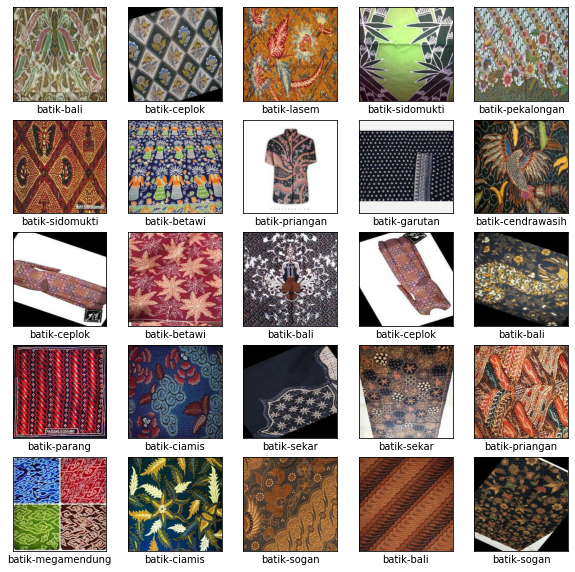

In [14]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

# **BUILD MODEL WITH MOBILENET**


In [25]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data, epochs=20)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                25620     
Total params: 2,283,604
Trainable params: 25,620
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


62/62 [==============================] - 97s 2s/step - loss: 2.7030 - accuracy: 0.2762 - val_loss: 2.3936 - val_accuracy: 0.3531
Epoch 2/20
62/62 [==============================] - 94s 2s/step - loss: 1.7662 - accuracy: 0.5872 - val_loss: 2.1376 - val_accuracy: 0.4458
Epoch 3/20
62/62 [==============================] - 95s 2s/step - loss: 1.5248 - accuracy: 0.6840 - val_loss: 1.9998 - val_accuracy: 0.5104
Epoch 4/20
62/62 [==============================] - 94s 2s/step - loss: 1.3744 - accuracy: 0.7445 - val_loss: 1.9228 - val_accuracy: 0.5448
Epoch 5/20
62/62 [==============================] - 94s 2s/step - loss: 1.2642 - accuracy: 0.7853 - val_loss: 1.8447 - val_accuracy: 0.5583
Epoch 6/20
62/62 [==============================] - 95s 2s/step - loss: 1.1935 - accuracy: 0.8266 - val_loss: 1.7670 - val_accuracy: 0.5948
Epoch 7/20
62/62 [==============================] - 95s 2s/step - loss: 1.1321 - accuracy: 0.8427 - val_loss: 1.7399 - val_accuracy: 0.6073
Epoch 8/20
62/62 [=============

## **EVALUATE MODEL**

In [26]:
loss, accuracy = model.evaluate(test_data)

30/30 [==============================] - 26s 868ms/step - loss: 1.3659 - accuracy: 0.7671


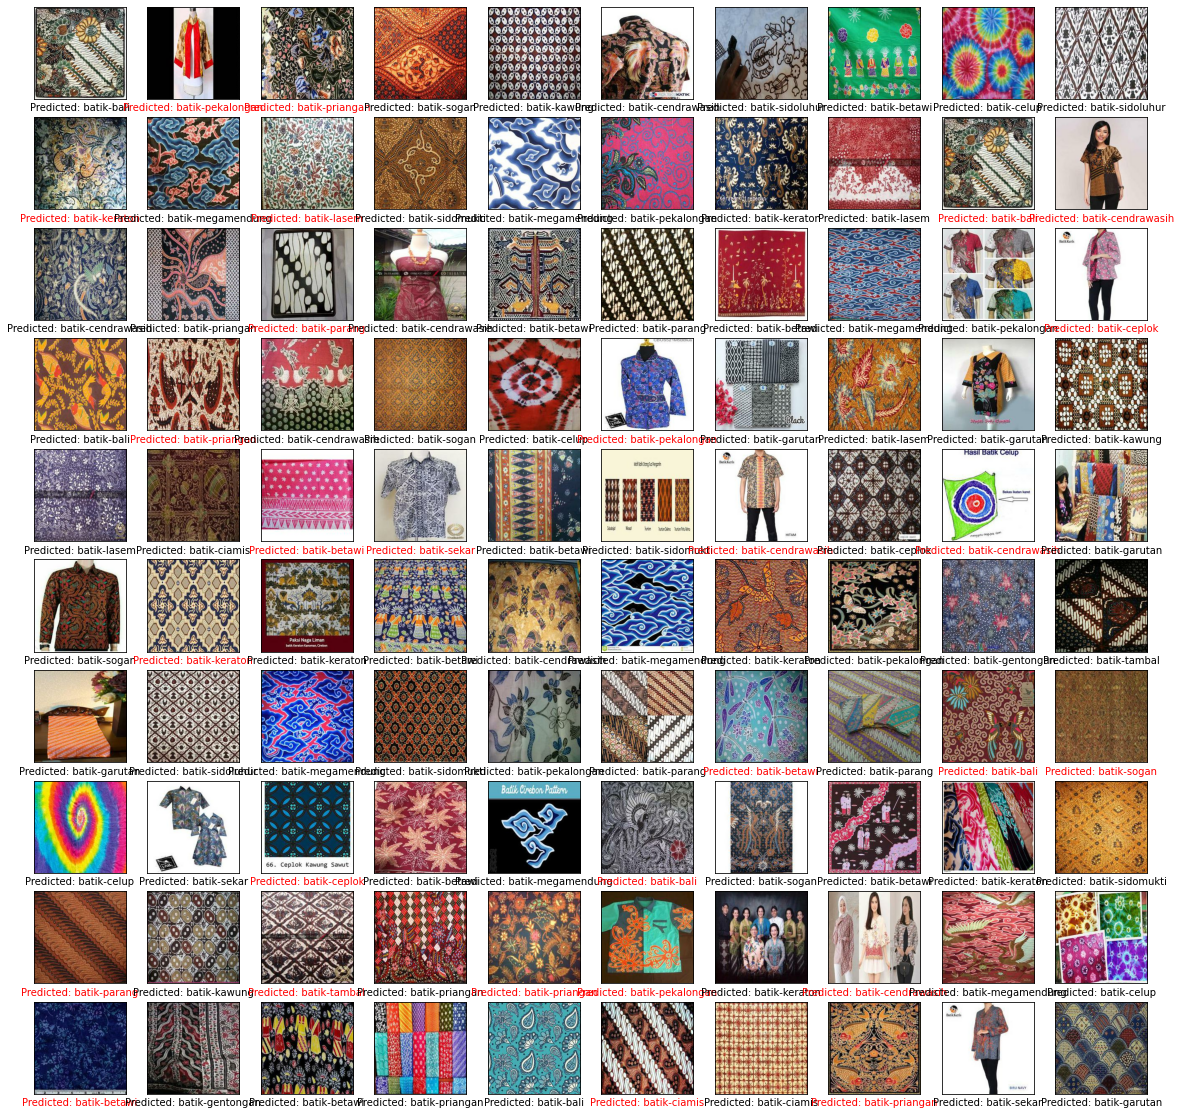

In [28]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

# **SAVE MODEL**

In [31]:
model.export(export_dir='/content/drive/MyDrive/Bangkit_Project/Bangkit_model/v4', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in /content/drive/MyDrive/Bangkit_Project/Bangkit_model/v4/labels.txt


INFO:tensorflow:Saving labels in /content/drive/MyDrive/Bangkit_Project/Bangkit_model/v4/labels.txt


In [32]:
config = QuantizationConfig.for_float16()

In [33]:
model.export(export_dir='/content/drive/MyDrive/Bangkit_Project/Bangkit_model/v4', tflite_filename='Model_MobileNet.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpdrjg3quz/assets


INFO:tensorflow:Assets written to: /tmp/tmpdrjg3quz/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp7zjhslxa/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp7zjhslxa/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Bangkit_Project/Bangkit_model/v4/Model_MobileNet.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Bangkit_Project/Bangkit_model/v4/Model_MobileNet.tflite
